In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-dataset/survey lung cancer.csv


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration

In [19]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

In [11]:
# Load the data
df = pd.read_csv('/kaggle/input/lung-cancer-dataset/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANC

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [7]:
# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.

In [20]:
# Define categorical columns
categorical_cols = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                   'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 
                   'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
                   'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

# Verify unique values in categorical columns to confirm encoding
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
GENDER: ['M' 'F']
SMOKING: [1 2]
YELLOW_FINGERS: [2 1]
ANXIETY: [2 1]
PEER_PRESSURE: [1 2]
CHRONIC DISEASE: [1 2]
FATIGUE : [2 1]
ALLERGY : [1 2]
WHEEZING: [2 1]
ALCOHOL CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS OF BREATH: [2 1]
SWALLOWING DIFFICULTY: [2 1]
CHEST PAIN: [2 1]
LUNG_CANCER: ['YES' 'NO']


#### **Analysis of Results**

- No missing values are present
- Mean age is 62.67 years, with a standard deviation of 8.21. The range is 21 to 87, indicating a wide age distribution, mostly centered around 57–69 years (25th to 75th percentiles).
- Other features (e.g., SMOKING, YELLOW_FINGERS) are encoded as 1 or 2, suggesting binary categorical variables (likely 1 = No, 2 = Yes). Their mean values hover around 1.5, indicating a balanced distribution between the two categories for most features.
- Gender contains ‘M’ (Male) and ‘F’ (Female), which will need to be encoded (e.g., 0 for Female, 1 for Male).
- LUNG_CANCER: Contains ‘YES’ and ‘NO’, which will be encoded as 1 and 0, respectively, for modeling.
- Other features (SMOKING to CHEST PAIN): All are binary, encoded as 1 or 2. Based on the dataset description (Yes/No), we assume 1 = No, 2 = Yes. We’ll transform these to 0/1 for consistency in modeling.

## 2. EDA

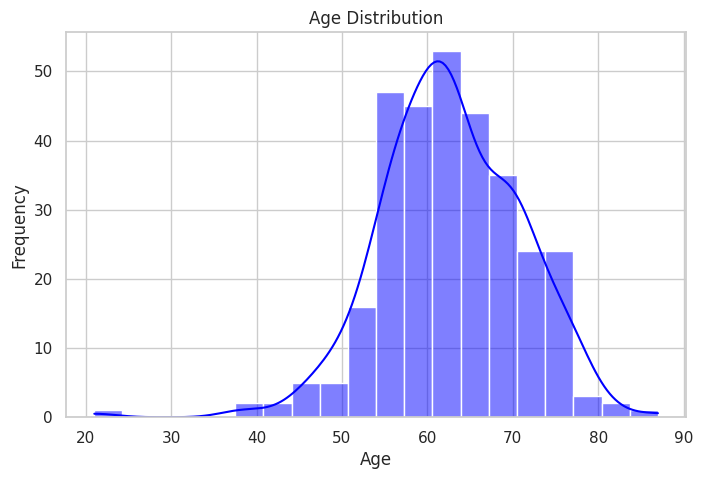

In [12]:
# Distribution of AGE
plt.figure(figsize=(8, 5))
sns.histplot(df['AGE'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

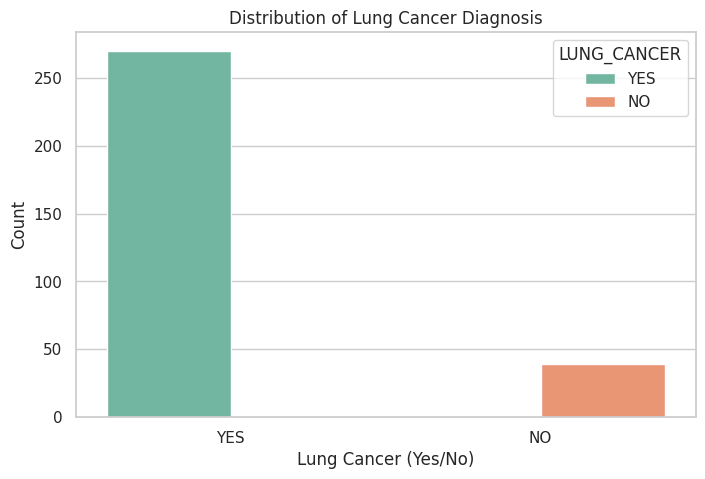

In [16]:
# Distribution of the target variable (LUNG_CANCER)
plt.figure(figsize=(8, 5))
sns.countplot(x='LUNG_CANCER', data=df, hue='LUNG_CANCER', palette='Set2')
plt.title('Distribution of Lung Cancer Diagnosis')
plt.xlabel('Lung Cancer (Yes/No)')
plt.ylabel('Count')
plt.show()

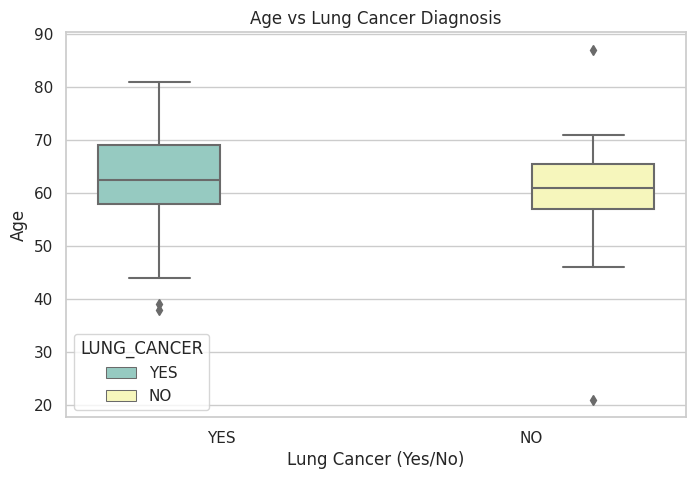

In [17]:
# Relationship between AGE and LUNG_CANCER
plt.figure(figsize=(8, 5))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df, hue='LUNG_CANCER', palette='Set3')
plt.title('Age vs Lung Cancer Diagnosis')
plt.xlabel('Lung Cancer (Yes/No)')
plt.ylabel('Age')
plt.show()

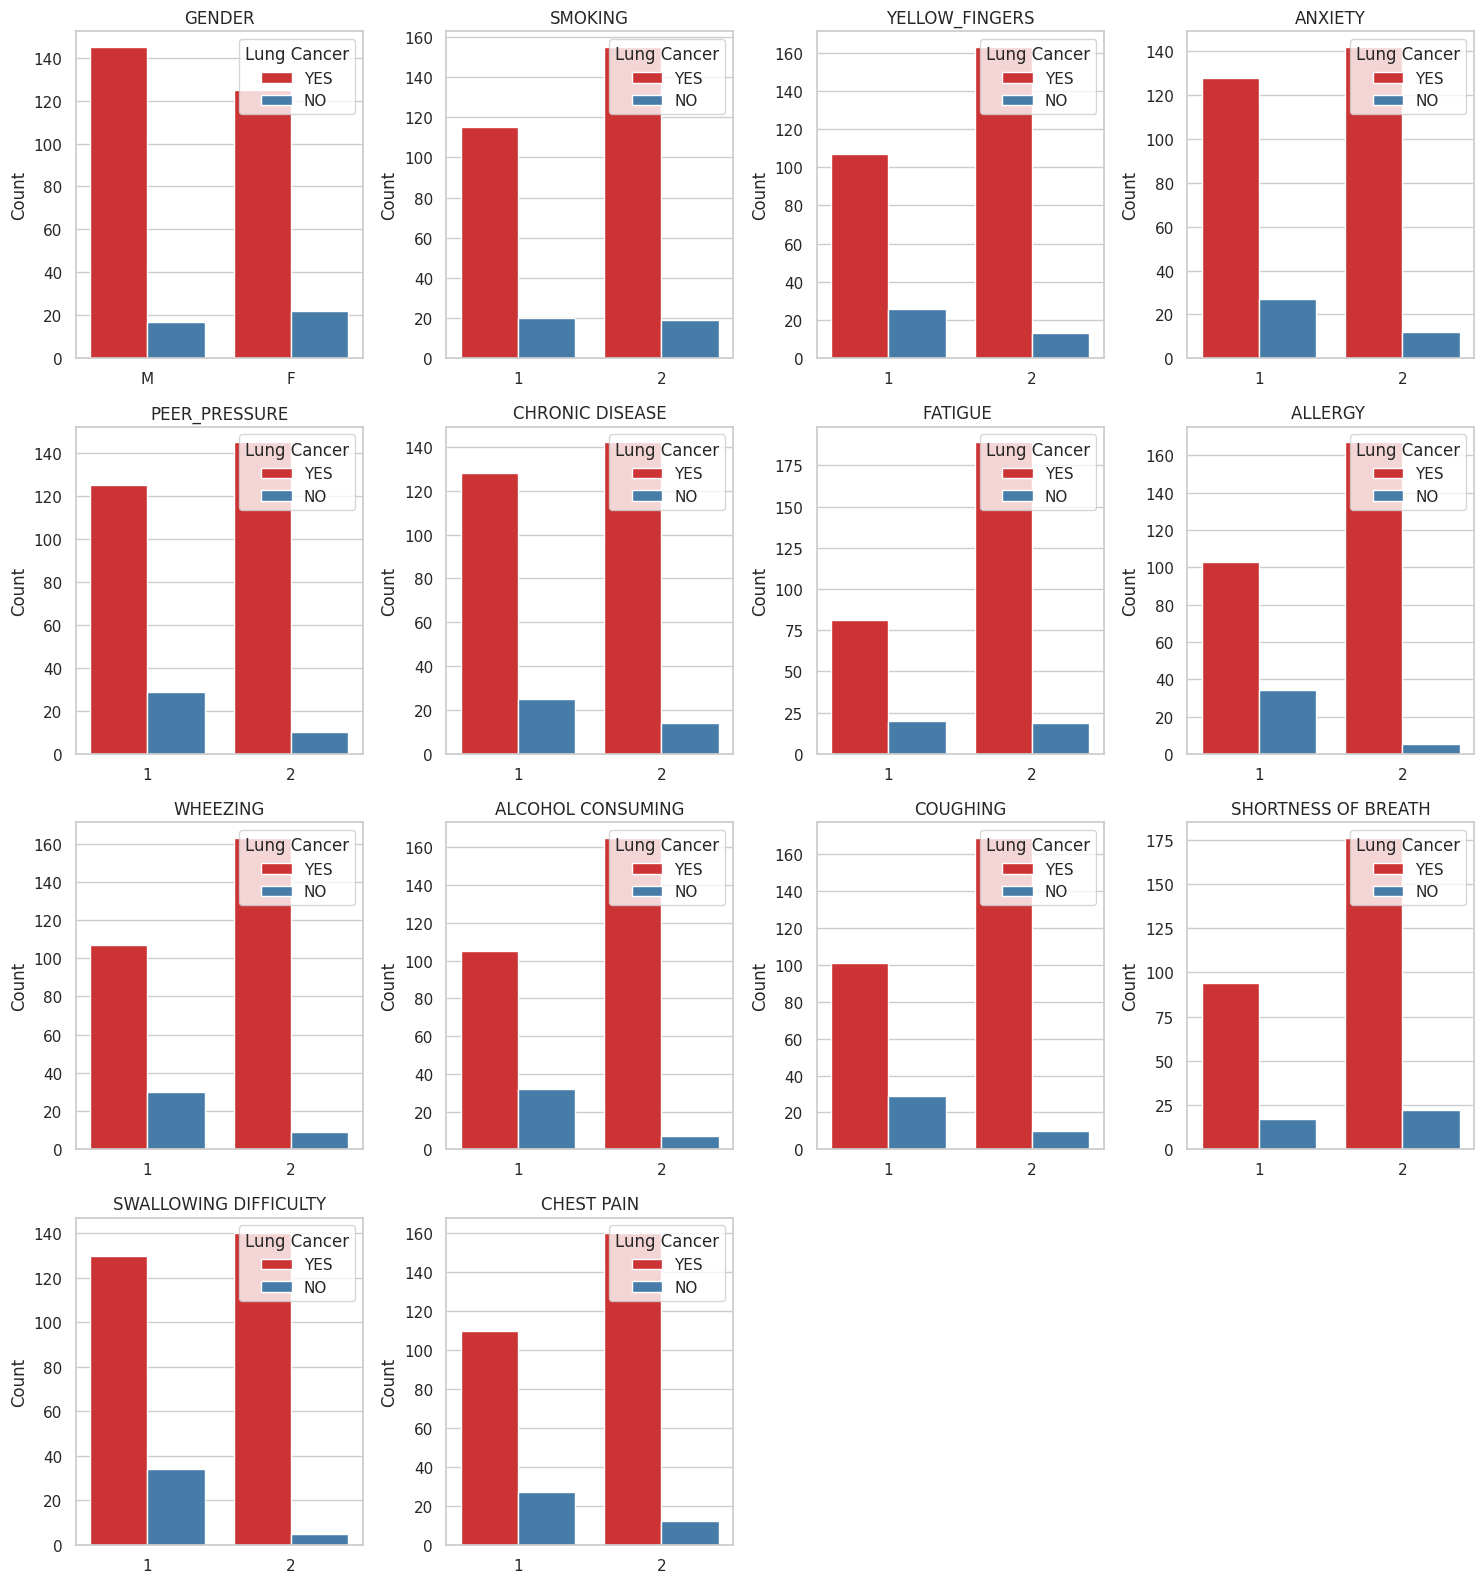

In [21]:
# Categorical feature distributions (side by side)
cat_features = categorical_cols[:-1]  # Exclude LUNG_CANCER (target)
n_cols = 4  # Number of columns in the grid
n_rows = (len(cat_features) + n_cols - 1) // n_cols  # Calculate rows needed

plt.figure(figsize=(15, 4 * n_rows))  # Adjust height based on rows
for i, col in enumerate(cat_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, hue='LUNG_CANCER', data=df, palette='Set1')
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Lung Cancer', loc='upper right')
plt.tight_layout()
plt.show()

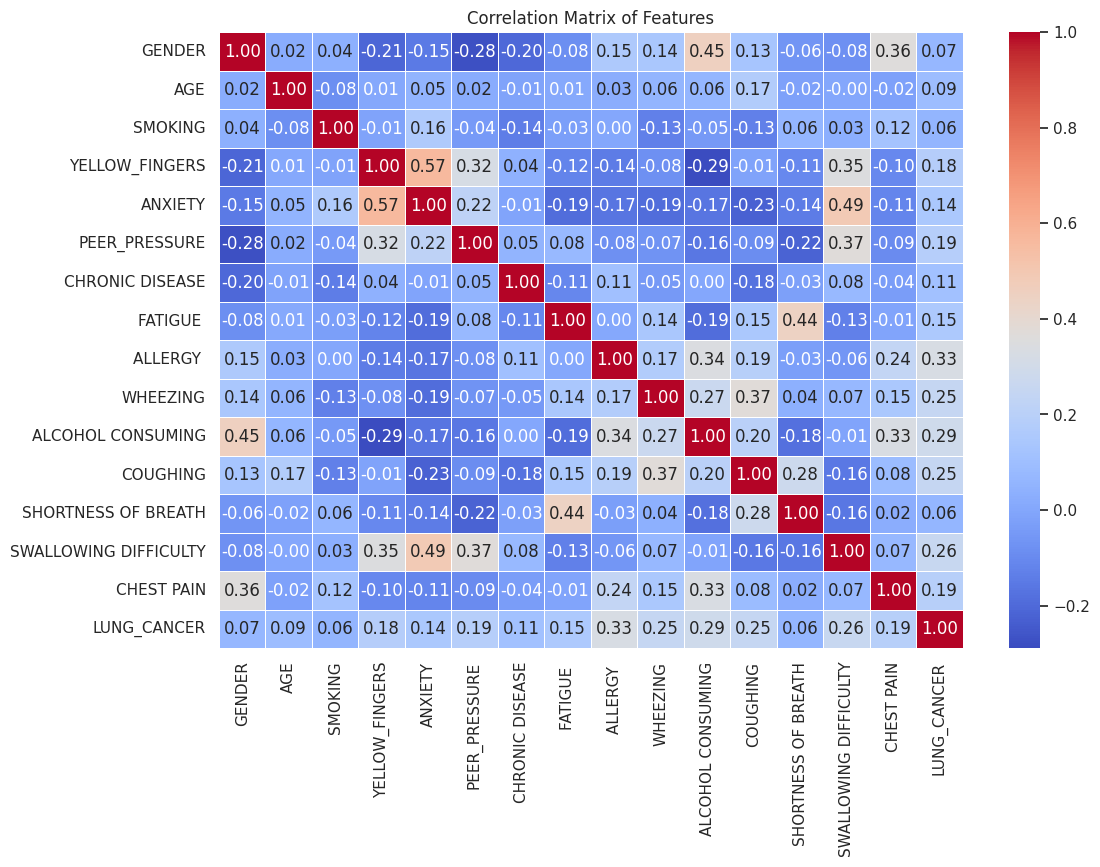

In [22]:
# Correlation analysis (after encoding categorical variables)
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [23]:
# Correlation with target variable
corr_with_target = df_encoded.corr()['LUNG_CANCER'].sort_values(ascending=False)
print("\nCorrelation with LUNG_CANCER:")
print(corr_with_target)


Correlation with LUNG_CANCER:
LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


#### **Analysis of Results**

**1. Distribution of the Target Variable (LUNG_CANCER):**

- A significant class imbalance: 270 instances of ‘YES’ vs. 40 instances of ‘NO’. This imbalance (roughly 87% YES, 13% NO) suggests that accuracy alone may not be a reliable metric. We’ll prioritize metrics like precision, recall, F1-score, and ROC-AUC, and consider techniques like class weighting or oversampling (e.g., SMOTE) during modeling.
  
**2. Age Distribution and Relationship with LUNG_CANCER:**

- AGE is roughly normally distributed, with a peak around 60–65 years.
- There are a few younger (20–30) and older (80–90) outliers.
- The boxplot of AGE vs. LUNG_CANCER indicates that the median age for both ‘YES’ and ‘NO’ groups is similar (62 years). However, the ‘YES’ group has a slightly wider interquartile range and more outliers (e.g., younger individuals with lung cancer).
- Age may not be a strong discriminator, but we’ll keep it for modeling as it might contribute in combination with other features.

**3. Categorical Feature Distributions (Side-by-Side Plots):**

- **GENDER:** Both males and females have a higher proportion of ‘YES’ for lung cancer, but males appear slightly more represented in the ‘YES’ category.
- **SMOKING:** Both smokers (2) and non-smokers (1) have a high proportion of ‘YES’, but the correlation (0.058) suggests smoking is not a strong predictor in this dataset, which is surprising and may warrant further investigation.
- **YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC DISEASE, SWALLOWING DIFFICULTY:** Individuals with these conditions (2) tend to have a higher likelihood of ‘YES’ for lung cancer, which aligns with their positive correlations (0.14–0.26).
- **FATIGUE, ALLERGY, WHEEZING, ALCOHOL CONSUMING, COUGHING, CHEST PAIN:** These features show a stronger association with ‘YES’ (higher counts of ‘YES’ for value 2), consistent with their higher correlations (0.15–0.33).
- **SHORTNESS OF BREATH:** Less discriminative, with a weaker correlation (0.06), as both values (1 and 2) have similar proportions of ‘YES’ and ‘NO’.
  
**4. Correlation Analysis:**

- LUNG_CANCER has the strongest positive correlations with ALLERGY (0.33), ALCOHOL CONSUMING (0.29), SWALLOWING DIFFICULTY (0.26), WHEEZING (0.25), and COUGHING (0.25). These features are likely important predictors.
- Weaker correlations with AGE (0.09), SMOKING (0.06), and SHORTNESS OF BREATH (0.06) suggest these may have less direct impact, but we’ll retain them for modeling.
- GENDER has a low correlation (0.07), indicating minimal direct influence, though it may interact with other features.
- Inter-feature correlations are generally low (most < 0.3), reducing concerns about multicollinearity. However, ANXIETY and YELLOW_FINGERS (0.57) and WHEEZING and COUGHING (0.37) show moderate correlations, which we’ll monitor during feature selection.

**5. Insights for Next Steps**

- **Class Imbalance:** The significant imbalance in LUNG_CANCER requires careful handling (class weights, SMOTE) to ensure the model doesn’t overpredict the majority class.
- **Feature Encoding:** We need to encode GENDER (M/F to 1/0), LUNG_CANCER (YES/NO to 1/0), and transform other binary features (1/2 to 0/1).
- **Feature Scaling:** AGE should be scaled since it’s numerical.
- **Feature Importance:** Features like ALLERGY, ALCOHOL CONSUMING, and SWALLOWING DIFFICULTY are likely key predictors based on correlations and distributions.
- **Modeling Strategy:** Given the imbalance, we’ll evaluate models using stratified cross-validation and focus on metrics like F1-score and ROC-AUC. We’ll also explore ensemble methods like Random Forest and XGBoost that handle imbalanced data well.

## 3. Preprocessing

In [25]:
# Create a copy of the dataset for preprocessing
df_preprocessed = df.copy()

In [26]:
# Step 1: Encode categorical variables
# Encode GENDER (M/F to 1/0) and LUNG_CANCER (YES/NO to 1/0)
le_gender = LabelEncoder()
le_target = LabelEncoder()
df_preprocessed['GENDER'] = le_gender.fit_transform(df_preprocessed['GENDER'])  # M=1, F=0
df_preprocessed['LUNG_CANCER'] = le_target.fit_transform(df_preprocessed['LUNG_CANCER'])  # YES=1, NO=0

# Transform binary features (1/2 to 0/1)
binary_cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 
               'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 
               'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for col in binary_cols:
    df_preprocessed[col] = df_preprocessed[col].map({1: 0, 2: 1})  # 1=No -> 0, 2=Yes -> 1

In [27]:
# Step 2: Scale the numerical feature (AGE)
scaler = StandardScaler()
df_preprocessed['AGE'] = scaler.fit_transform(df_preprocessed['AGE'].values.reshape(-1, 1))

In [28]:
# Step 3: Split features and target
X = df_preprocessed.drop('LUNG_CANCER', axis=1)
y = df_preprocessed['LUNG_CANCER']

In [29]:
# Step 4: Train-test split with stratification to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
# Step 5: Create a copy of the preprocessed data for hyperparameter tuning
# Combine X_train and y_train into a single DataFrame
df_train_preprocessed = X_train.copy()
df_train_preprocessed['LUNG_CANCER'] = y_train

# Verify the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

# Display the first few rows of the preprocessed training data
print("\nFirst 5 rows of preprocessed training data:")
print(df_train_preprocessed.head())

Training set shape: (247, 15) (247,)
Test set shape: (62, 15) (62,)

Class distribution in training set:
LUNG_CANCER
1    0.874494
0    0.125506
Name: proportion, dtype: float64

Class distribution in test set:
LUNG_CANCER
1    0.870968
0    0.129032
Name: proportion, dtype: float64

First 5 rows of preprocessed training data:
     GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
26        0 -0.204116        1               1        1              0   
47        0  0.161871        1               1        0              1   
198       0  1.259833        1               1        1              0   
90        0 -0.082120        0               0        0              1   
303       1 -1.424074        0               1        0              0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
26                 0         1         1         0                  1   
47                 0         1         0         1                  1   
198    

## 4. Feature Engineering

In [32]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

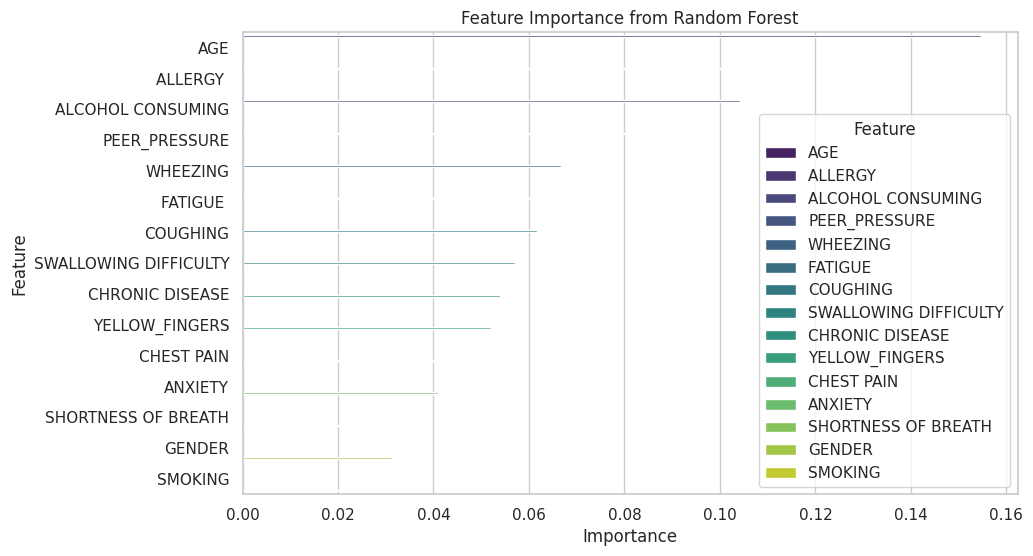


Feature Importances:
                  Feature  Importance
1                     AGE    0.154595
8                ALLERGY     0.118008
10      ALCOHOL CONSUMING    0.104259
5           PEER_PRESSURE    0.086990
9                WHEEZING    0.066694
7                FATIGUE     0.063517
11               COUGHING    0.061734
13  SWALLOWING DIFFICULTY    0.057081
6         CHRONIC DISEASE    0.053870
3          YELLOW_FINGERS    0.052063
14             CHEST PAIN    0.045801
4                 ANXIETY    0.041051
12    SHORTNESS OF BREATH    0.036206
0                  GENDER    0.031410
2                 SMOKING    0.026721


In [33]:
# Step 1: Assess feature importance using Random Forest
# Initialize and train a Random Forest model with class weights to handle imbalance
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display feature importances
print("\nFeature Importances:")
print(feature_importances)

In [34]:
# Step 2: Create interaction features based on correlations
# From correlation analysis, ANXIETY and YELLOW_FINGERS had a high correlation (0.57)
# Create an interaction feature: ANXIETY * YELLOW_FINGERS
X_train['ANXIETY_YELLOW_FINGERS'] = X_train['ANXIETY'] * X_train['YELLOW_FINGERS']
X_test['ANXIETY_YELLOW_FINGERS'] = X_test['ANXIETY'] * X_test['YELLOW_FINGERS']

# Also create an interaction feature for WHEEZING and COUGHING (correlation 0.37)
X_train['WHEEZING_COUGHING'] = X_train['WHEEZING'] * X_train['COUGHING']
X_test['WHEEZING_COUGHING'] = X_test['WHEEZING'] * X_test['COUGHING']

In [35]:
# Step 3: Update the preprocessed copy for hyperparameter tuning
df_train_preprocessed = X_train.copy()
df_train_preprocessed['LUNG_CANCER'] = y_train

# Verify the new features
print("\nFirst 5 rows of updated training data with new features:")
print(X_train.head())
print("\nUpdated training set shape:", X_train.shape)
print("Updated test set shape:", X_test.shape)


First 5 rows of updated training data with new features:
     GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
26        0 -0.204116        1               1        1              0   
47        0  0.161871        1               1        0              1   
198       0  1.259833        1               1        1              0   
90        0 -0.082120        0               0        0              1   
303       1 -1.424074        0               1        0              0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
26                 0         1         1         0                  1   
47                 0         1         0         1                  1   
198                1         0         1         0                  1   
90                 0         0         0         1                  1   
303                1         1         1         1                  1   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY 

#### **Analysis of Results**

**1. Feature Importance:**

- AGE emerges as the most important feature (0.1546). This suggests age plays a significant role in predicting lung cancer, despite its moderate correlation (0.089) with the target. This indicates its non-linear contribution in the tree-based model.
- ALLERGY (0.1180) and ALCOHOL CONSUMING (0.1043) follow, aligning with their high correlations (0.328 and 0.289, respectively), reinforcing their predictive power.
- PEER_PRESSURE (0.0870), WHEEZING (0.0667), and FATIGUE (0.0635) also rank highly, consistent with their observed distributions and correlations (0.186, 0.249, 0.151).
- Less important features include SMOKING (0.0267) and GENDER (0.0314), which have low correlations (0.058 and 0.067) and minimal impact, possibly due to the dataset’s encoding or limited variability.

**2. New Interaction Features:**

- **ANXIETY_YELLOW_FINGERS:** Added as a product of ANXIETY and YELLOW_FINGERS, reflects their moderate correlation (0.57). For example, row 26 has a value of 1 (1 * 1), indicating both conditions are present.
- **WHEEZING_COUGHING:** Added as a product of WHEEZING and COUGHING, using thier correlation (0.37). Row 47 has a value of 1 (1 * 1), which indicates co-occurrence.


## 5. Model Selection

In [37]:
# Define models with class weights to handle imbalance
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=1/0.125506, random_state=42)  # Adjusted for imbalance ratio
}

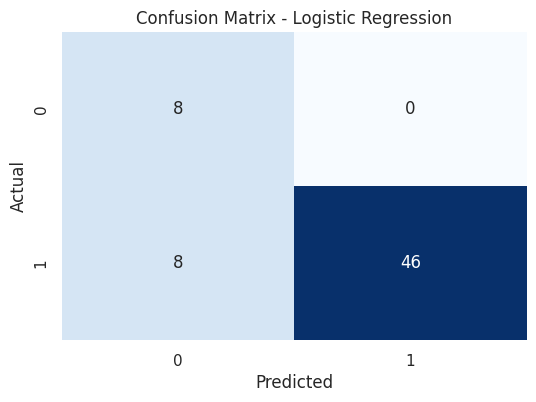


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       1.00      0.85      0.92        54

    accuracy                           0.87        62
   macro avg       0.75      0.93      0.79        62
weighted avg       0.94      0.87      0.89        62



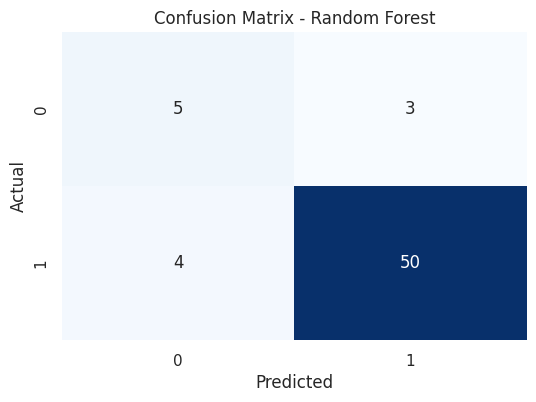


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.94      0.93      0.93        54

    accuracy                           0.89        62
   macro avg       0.75      0.78      0.76        62
weighted avg       0.89      0.89      0.89        62



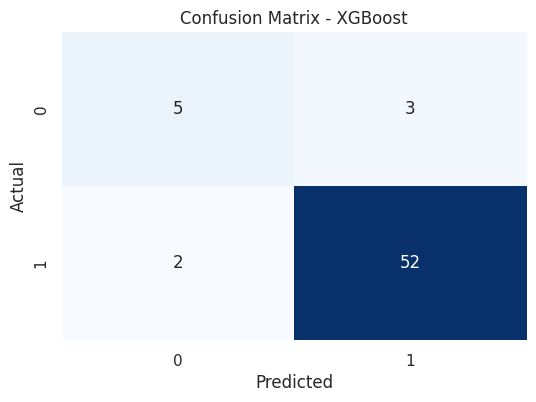


Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.95      0.96      0.95        54

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62


Model Performance Summary:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.870968   1.000000  0.851852  0.920000  0.956019
Random Forest        0.887097   0.943396  0.925926  0.934579  0.944444
XGBoost              0.919355   0.945455  0.962963  0.954128  0.932870


In [39]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Print detailed classification report
    print(f"\nClassification Report - {name}:")
    print(classification_report(y_test, y_pred))

# Display summary of results
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)

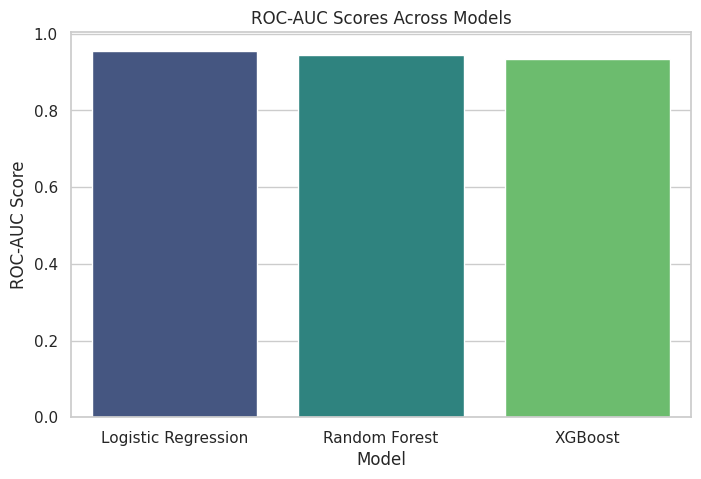

In [40]:
# Plot ROC-AUC comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y='ROC-AUC', data=results_df, palette='viridis')
plt.title('ROC-AUC Scores Across Models')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.show()

In [41]:
# Identify the best model based on F1-Score
best_model_name = results_df['F1-Score'].idxmax()
best_model_score = results_df['F1-Score'].max()
print(f"\nBest Model: {best_model_name} with F1-Score: {best_model_score:.4f}")


Best Model: XGBoost with F1-Score: 0.9541


#### **Analysis of Results**

**1. Model Performance Summary:**

- **XGBoost:** Achieves the highest overall performance with an F1-Score of 0.9541, accuracy of 0.9194, precision of 0.9455, recall of 0.9630, and ROC-AUC of 0.9329. Excels in balancing precision and recall for the majority class (1/YES) while performing well on the minority class (0/NO).
- **Random Forest:** Performs well with an F1-Score of 0.9346, accuracy of 0.8871, precision of 0.9434, recall of 0.9259, and ROC-AUC of 0.9444. It has a slightly higher ROC-AUC than XGBoost, which shows better probability discrimination, but its F1-Score is lower due to a slightly worse balance of precision and recall.
- **Logistic Regression:** Has the lowest performance with an F1-Score of 0.9200, accuracy of 0.8710, precision of 1.0000, recall of 0.8519, and ROC-AUC of 0.9560. While its ROC-AUC is the highest, its recall for the majority class is lower, and it struggles more with the minority class compared to the other models.
  
**2. Confusion Matrices**

- **Logistic Regression:** Perfectly identifies all minority class samples (0/NO, 8/8) but misses some majority class samples (1/YES, 46/54). This high precision (1.00) comes at the cost of recall (0.85) for the majority class.
- **Random Forest:** Correctly identifies 5/8 minority class samples and 50/54 majority class samples. It balances precision (0.94) and recall (0.93) well for the majority class but has a lower recall (0.62) for the minority class.
- **XGBoost:** Identifies 5/8 minority class samples and 52/54 majority class samples, achieving the best recall (0.96) for the majority class and a solid precision (0.95). Its minority class recall (0.62) matches Random Forest, but its overall balance is better, leading to the highest F1-Score.

**3. Classification Reports:**

- **XGBoost:** Best macro-average F1-Score (0.81) and weighted-average F1-Score (0.92). Shows strong performance across both classes despite the imbalance. Its recall for the minority class (0.62) is acceptable given the dataset’s skew.
- **Random Forest:** Slightly lower macro-average F1-Score (0.76) due to a lower recall for the minority class (0.62), but its weighted-average F1-Score (0.89) is competitive.
- **Logistic Regression:** High precision for the majority class (1.00) but lower recall (0.85) leads to a lower weighted-average F1-Score (0.89). Its macro-average F1-Score (0.79) is decent but not as balanced as XGBoost.
  
**4. ROC-AUC Scores:**

- Logistic Regression leads with a ROC-AUC of 0.9560, followed by Random Forest (0.9444) and XGBoost (0.9329). While Logistic Regression excels in probability discrimination, its overall classification performance (F1-Score) is lower, making XGBoost the better choice for this task.

**5. Best Model:**

- **XGBoost** is the best model with an F1-Score of 0.9541, which makes it the ideal model. Its balance of precision, recall, and overall performance makes it well-suited for this imbalanced dataset.

## 6. Conclusion

This project aimed to predict lung cancer diagnosis using a dataset of 309 samples with 15 features that include demographic, behavioral, and symptomatic variables. The target variable (LUNG_CANCER) was highly imbalanced (87% YES, 13% NO), which necessitated careful preprocessing, feature engineering, and model evaluation.

- **Data Exploration:** Identified no missing values, encoded binary features (1/2 to 0/1), and confirmed class imbalance. Key features like ALLERGY, ALCOHOL CONSUMING, and SWALLOWING_DIFFICULTY showed strong correlations with the target.
- **Preprocessing:** Encoded categorical variables (GENDER, LUNG_CANCER), scaled AGE, and performed a stratified train-test split (80-20).
- **Feature Engineering:** Added interaction features (ANXIETY_YELLOW_FINGERS, WHEEZING_COUGHING) and used Random Forest to identify AGE, ALLERGY, and ALCOHOL CONSUMING as top features.
- **Model Selection:** Evaluated Logistic Regression, Random Forest, and XGBoost. XGBoost performed best with an F1-Score of 0.9541 and ROC-AUC of 0.9329, despite the imbalance.

**Final Model Performance**

The XGBoost model achieved:

- **F1-Score:** 0.9541
- **ROC-AUC:** 0.9329
- **Accuracy:** 0.9194

**Key Features:** AGE, ALLERGY, ALCOHOL CONSUMING, and PEER_PRESSURE were the most influential, underscoring the role of age and behavioral factors in predicting lung cancer.